## 7.2 Sampling and creating training data

#### 1. [E] If you have 6 shirts and 4 pairs of pants, how many ways are there to choose 2 shirts and 1 pair of pants?

**Answer:**
Ways to choose 2 shirts and a pair of pants = 6c2 * 4c1 = 60

#### 2. [M] What is the difference between sampling with vs. without replacement? Name an example of when you would use one rather than the other?

**Answer:**

Sampling with replacement refers to the process of randomly selecting items from a population, with the possibility of selecting the same item multiple times. An example of this would be drawing marbles from a bag and putting them back in the bag after each draw.

Sampling with replacement consists of: 

- A sampling unit (like a glass bead or a row of data) being randomly drawn from a population (like a jar of beads or a dataset).
- Recording which sampling unit was drawn.
- Returning the sampling unit to the population.

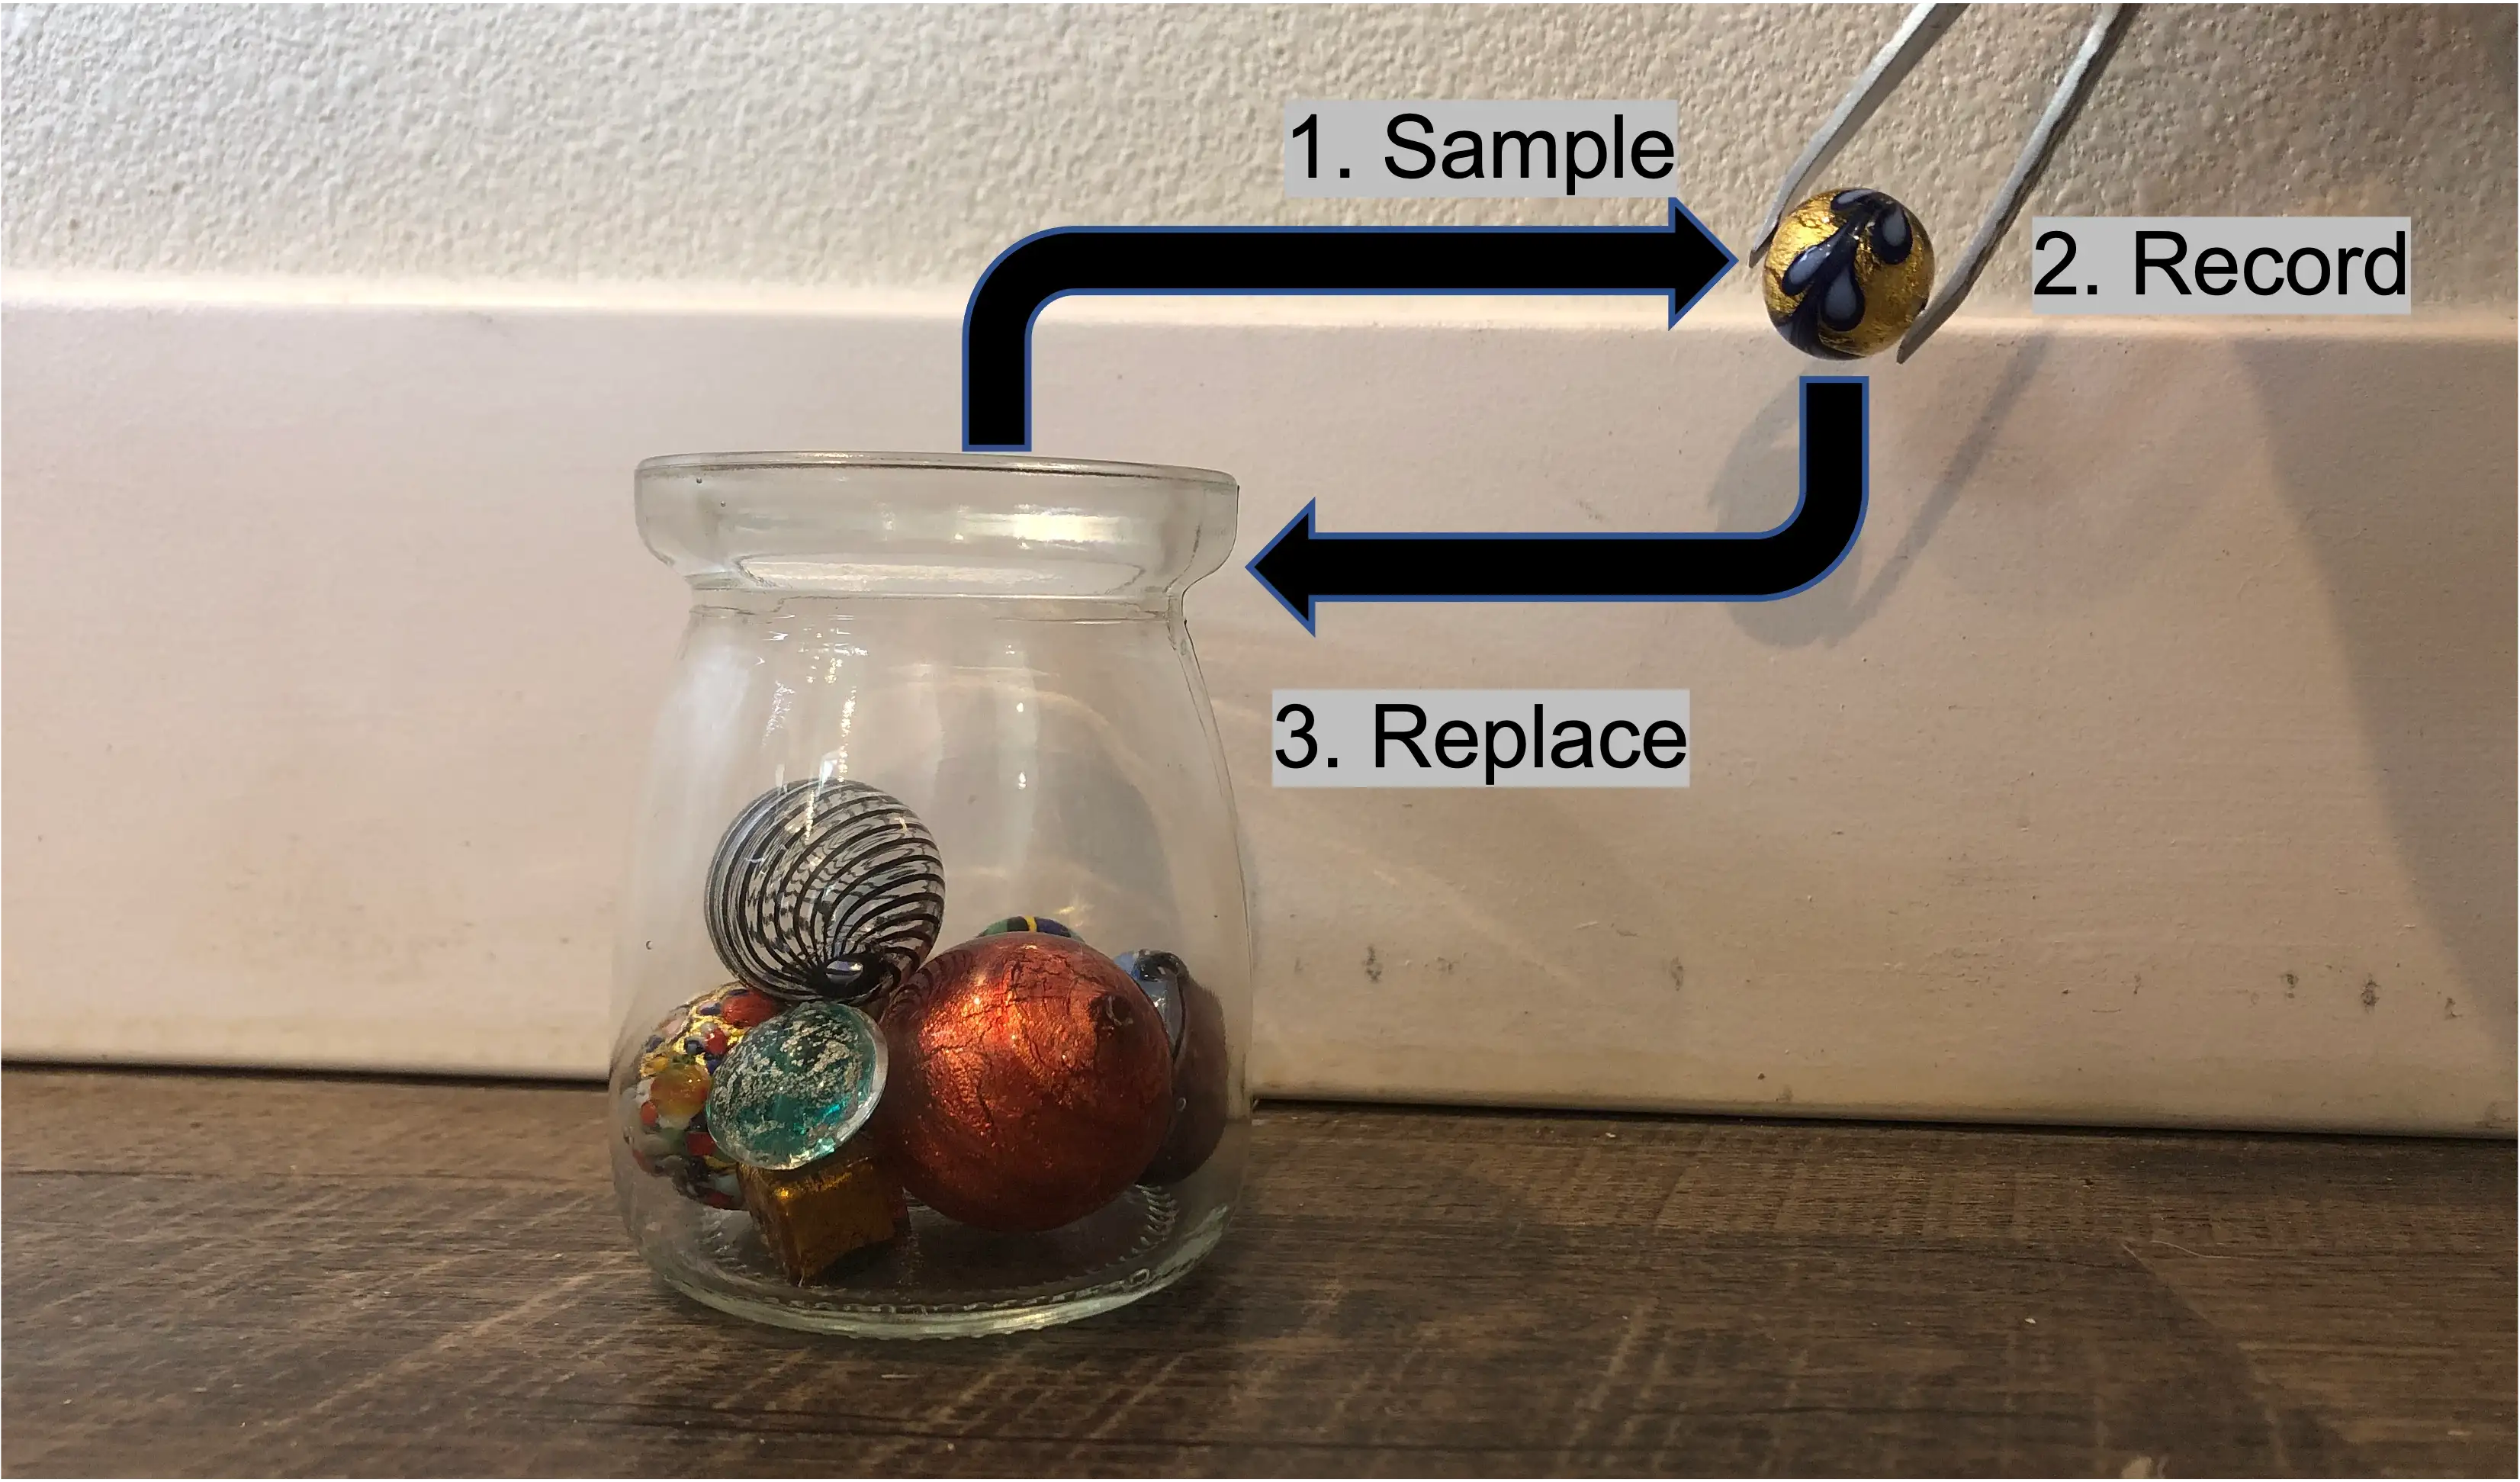

```python
import numpy as np
np.random.seed(3)
# a parameter: generate a list of unique random numbers (from 0 to 11)
# size parameter: how many samples we want (12)
# replace = True: sample with replacement
np.random.choice(a=12, size=12, replace=True)
```

Sampling without replacement refers to the process of randomly selecting items from a population, without the possibility of selecting the same item multiple times. An example of this would be drawing cards from a deck without replacing the cards after each draw.

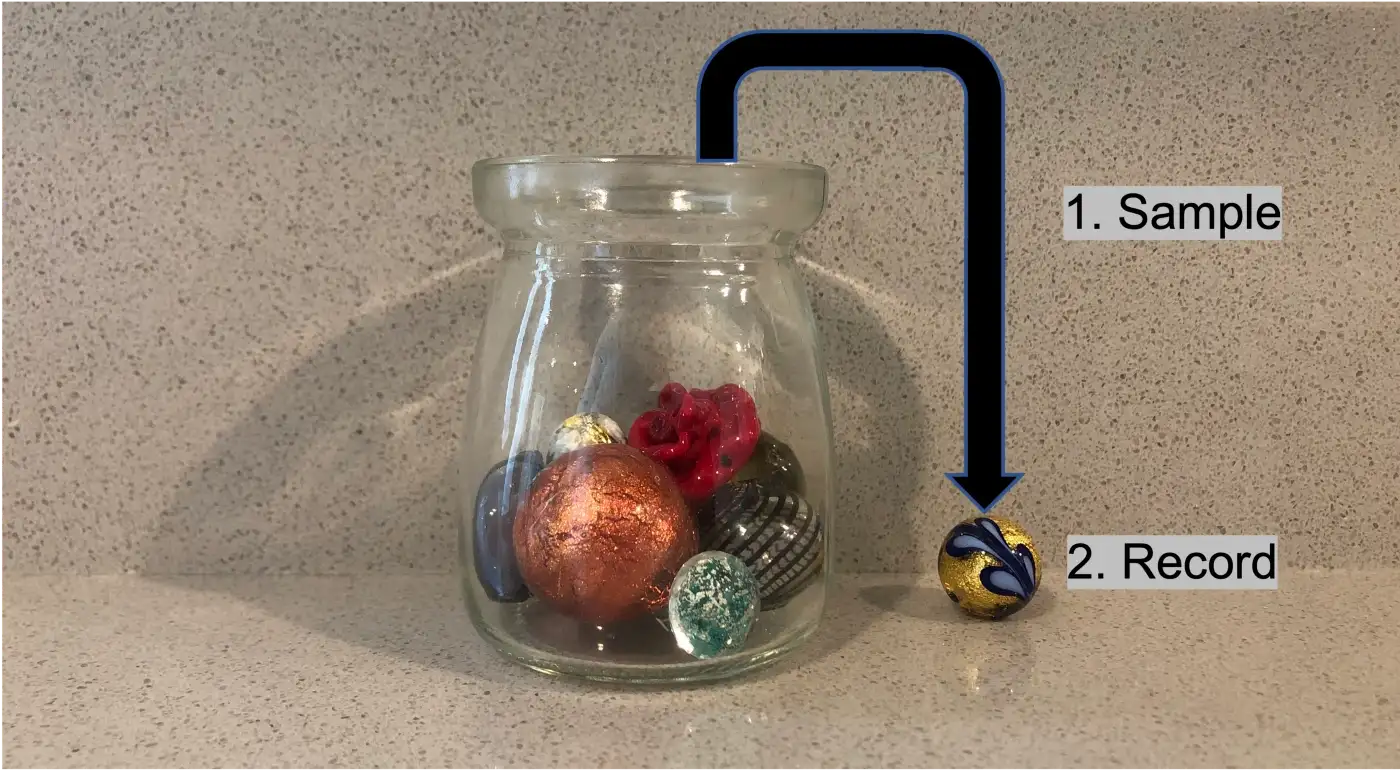

```python
import numpy as np
np.random.seed(3)
# a parameter: generate a list of unique random numbers (from 0 to 11)
# size parameter: how many samples we want (12)
# replace = False: sample without replacement
np.random.choice(a=12, size=12, replace=False)
```

The reason why the sampling unit is returned to the population before the next sampling unit is drawn is to make sure the probability of selecting any particular sampling unit remains the same in future draws. There are many applications of sampling with replacement throughout data science. Many of these applications use bootstrapping which is a statistical procedure that uses sampling with replacement on a dataset to create many simulated samples. Datasets that are created with sampling with replacement so that they have the same number of samples as the original dataset are called bootstrapped datasets. Bootstrapped data is used in machine learning algorithms like bagged trees and random forests as well as in statistical methods like bootstrapped confidence intervals, and more.


Sampling without replacement is used throughout data science. One very common use is in model validation procedures like train test split and cross validation. In short, each of these procedures allows you to simulate how a machine learning model would perform on new/unseen data.

#### 3. [M] Explain Markov chain Monte Carlo sampling.

Markov Chain Monte Carlo (MCMC) sampling is a method for approximating a multidimensional probability distribution using a sequence of random samples. The samples are generated through a Markov chain, which is a stochastic process that satisfies the Markov property. The Markov property states that the probability of being in a particular state depends only on the previous state and not on the entire history of the process.

The most popular MCMC methods are Metropolis-Hastings algorithm and the Gibbs sampler. They both have the same general idea, which is to generate a proposal sample from the current sample and then accept or reject it based on a probability calculated from the ratio of the target distribution and the proposal distribution.

In the Metropolis-Hastings algorithm, the proposal sample is generated from a proposal distribution, which is usually symmetric and easy to sample from. A candidate sample is generated and the acceptance probability is calculated as the ratio of the target distribution evaluated at the candidate sample, and the target distribution evaluated at the current sample, multiplied by the ratio of the proposal distribution evaluated at the current sample, and the proposal distribution evaluated at the candidate sample.

The Gibbs sampler is a special case of the Metropolis-Hastings algorithm where the proposal distribution is the conditional distribution of each variable given the current values of the other variables.

MCMC sampling is a powerful method for approximating complex distributions and can be used in many applications such as Bayesian statistics, machine learning, physics and chemistry. However, it can be computationally expensive and requires a large number of samples to achieve good results.


#### 4. [M] If you need to sample from high-dimensional data, which sampling method would you choose?

**Answer:**
If you need to sample from high-dimensional data, one method you may choose is Markov Chain Monte Carlo (MCMC) sampling. MCMC is a powerful and versatile method for approximating complex, high-dimensional distributions. It is particularly useful when the probability distribution is intractable, and traditional methods such as rejection sampling or inverse transform sampling are not feasible.

The most popular MCMC methods are Metropolis-Hastings algorithm and the Gibbs sampler. They both have the same general idea, which is to generate a proposal sample from the current sample and then accept or reject it based on a probability calculated from the ratio of the target distribution and the proposal distribution.

Another sampling method you may use is the Hamiltonian Monte Carlo (HMC), which is a variant of the Metropolis-Hastings algorithm that uses gradient information of the target distribution to guide the sampling process. HMC is particularly useful when the target distribution has a complex structure with many ridges and valleys, and it can efficiently explore the high dimensional space.

Another method is the slice sampling, it is a simple and efficient sampling method that can handle high-dimensional distributions. It works by first selecting a random value along one of the dimensions, then sampling uniformly from the region of the space where the target distribution is greater than that value.

It is also worth mentioning that some other methods such as Importance Sampling, Rejection Sampling, and Adaptive Rejection Sampling may also work well in high-dimensional spaces if implemented correctly.

It is important to note that the choice of sampling method depends on the specific characteristics of the target distribution and the computational resources available. Therefore, it is recommended to evaluate different methods and compare their performance in terms of their efficiency and the quality of the samples.



#### 5. [H] Suppose we have a classification task with many classes. An example is when you have to predict the next word in a sentence -- the next word can be one of many, many possible words. If we have to calculate the probabilities for all classes, it’ll be prohibitively expensive. Instead, we can calculate the probabilities for a small set of candidate classes. This method is called candidate sampling. Name and explain some of the candidate sampling algorithms.

**Hint**: check out this great [article](https://www.tensorflow.org/extras/candidate_sampling.pdf) on candidate sampling by the TensorFlow team.

**Answer:**
Candidate sampling is a method used to approximate the distribution of classes for a multi-class classification problem, by reducing the number of classes considered during training. This can be useful when the number of classes is very large, as it can be computationally expensive to calculate the probability for all classes.

Some candidate sampling algorithms are:

- Log-Uniform Sampling: This algorithm samples the classes from a log-uniform distribution, where the probability of selecting a class is proportional to the logarithm of the class frequency. This method is useful when the class frequencies are very skewed, as it gives more probability to the rarer classes.
- (NCE) Noise-Contrastive Estimation: It is a method to estimate the probability of a class by comparing it to a set of noise samples. It is used to compare the similarity of the input sample to a set of noise samples, and returns a probability that the input sample belongs to a specific class.
- (Unigram) Sampling: This algorithm samples the classes according to their frequency, where the probability of selecting a class is proportional to its frequency. This method is useful when the class frequencies are roughly equal, as it gives a similar probability to all classes.
- Adaptive Sampling: This algorithm adapts the sampling probabilities over time, based on the performance of the model on the sampled classes. It adjusts the sampling probabilities to give more probability to the classes that are harder to classify and less probability to the classes that are easy to classify.
It's important to note that candidate sampling is not always necessary and the choice of sampling method depends on the specific characteristics of the dataset and the computational resources available. However, it can be a useful tool to speed up training and improve the model performance.

#### 6. Suppose you want to build a model to classify whether a Reddit comment violates the website’s rule. You have 10 million unlabeled comments from 10K users over the last 24 months and you want to label 100K of them.
    i. [M] How would you sample 100K comments to label?
    ii. [M] Suppose you get back 100K labeled comments from 20 annotators and you want to look at some labels to estimate the quality of the labels. How many labels would you look at? How would you sample them?

    **Hint**: This [article](https://www.cloudresearch.com/resources/guides/sampling/pros-cons-of-different-sampling-methods/) on different sampling methods and their use cases might help.
    
**ANSWER:**
- To sample 100K comments to label, you could use a random sampling method. This would involve randomly selecting 100K comments from the 10 million unlabeled comments. Another option could be to use stratified sampling, where you would divide the comments into several strata based on some characteristics, such as the user or the time of posting, and then randomly sample from each stratum to ensure that the sample is representative of the population. Additionally, you could use a combination of both methods, such as random sampling within each stratum.

- To estimate the quality of the labels, you could look at a sample of the labeled comments. The size of the sample will depend on the resources available and the desired level of confidence in the estimate. A common rule of thumb is to use a sample of at least 30 labels. To sample the labels, you could use a random sampling method, where you randomly select a subset of the 100K labeled comments. Another option could be to use stratified sampling, where you would divide the labels into several strata based on some characteristics, such as the annotator or the class, and then randomly sample from each stratum to ensure that the sample is representative of the labels.

7. [M] Suppose you work for a news site that historically has translated only 1% of all its articles. Your coworker argues that we should translate more articles into Chinese because translations help with the readership. On average, your translated articles have twice as many views as your non-translated articles. What might be wrong with this argument?

    **Hint**: think about selection bias.
    
**Answer:**
Selection bias refers to the situation where the sample of data being analyzed is not representative of the population being studied. In the case of the news site, if the sample of translated articles is not representative of all articles, it could lead to selection bias. For example, if the translated articles are disproportionately of a certain topic or from a certain time period, this could skew the results.

Additionally, if the decision to translate an article is based on factors such as the views of an article, it could lead to selection bias as well. For instance, if the articles with high views are more likely to be translated, this could lead to an overestimation of the effect of translations on views.

To correct for selection bias, it would be important to randomly sample articles for translation and control for other factors that could be driving the increased views, such as topic and timing of the post, in order to get a more accurate estimate of the effect of translations on views.

8. [M] How to determine whether two sets of samples (e.g. train and test splits) come from the same distribution?



9. [H] How do you know you’ve collected enough samples to train your ML model?
10. [M] How to determine outliers in your data samples? What to do with them?
11. Sample duplication
    1. [M] When should you remove duplicate training samples? When shouldn’t you?
    1. [M] What happens if we accidentally duplicate every data point in your train set or in your test set?
12. Missing data
    1. [H] In your dataset, two out of 20 variables have more than 30% missing values. What would you do?
    1. [M] How might techniques that handle missing data make selection bias worse? How do you handle this bias?
13. [M] Why is randomization important when designing experiments (experimental design)?
14. Class imbalance.
    1. [E] How would class imbalance affect your model?
    1. [E] Why is it hard for ML models to perform well on data with class imbalance?
    1. [M] Imagine you want to build a model to detect skin legions from images. In your training dataset, only 1% of your images shows signs of legions. After training, your model seems to make a lot more false negatives than false positives. What are some of the techniques you'd use to improve your model?
15. Training data leakage.
    1. [M] Imagine you're working with a binary task where the positive class accounts for only 1% of your data. You decide to oversample the rare class then split your data into train and test splits. Your model performs well on the test split but poorly in production. What might have happened?
    1. [M] You want to build a model to classify whether a comment is spam or not spam. You have a dataset of a million comments over the period of 7 days. You decide to randomly split all your data into the train and test splits. Your co-worker points out that this can lead to data leakage. How?

    **Hint**: You might want to clarify what oversampling here means. Oversampling can be as simple as dupplicating samples from the rare class.

16. [M] How does data sparsity affect your models?
    
    **Hint**: Sparse data is different from missing data.

17. Feature leakage
    26. [E] What are some causes of feature leakage?
    27. [E] Why does normalization help prevent feature leakage?
    28. [M] How do you detect feature leakage?
18. [M] Suppose you want to build a model to classify whether a tweet spreads misinformation. You have 100K labeled tweets over the last 24 months. You decide to randomly shuffle on your data and pick 80% to be the train split, 10% to be the valid split, and 10% to be the test split. What might be the problem with this way of partitioning?
19. [M] You’re building a neural network and you want to use both numerical and textual features. How would you process those different features?
20. [H] Your model has been performing fairly well using just a subset of features available in your data. Your boss decided that you should use all the features available instead. What might happen to the training error? What might happen to the test error?

    **Hint**: Think about the curse of dimensionality: as we use more dimensions to describe our data, the more sparse space becomes, and the further are data points from each other.

---
*This book was created by [Chip Huyen](https://huyenchip.com) with the help of wonderful friends. For feedback, errata, and suggestions, the author can be reached [here](https://huyenchip.com/communication/). Copyright ©2021 Chip Huyen.*